<a href="https://colab.research.google.com/github/purshottamkumarr/Deep-Learning-learning-project/blob/main/Project_Cat_vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Kaggle Api

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 99% 804M/812M [00:08<00:00, 113MB/s] 
100% 812M/812M [00:08<00:00, 99.4MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
## Extracting the compressed dataset

from zipfile import ZipFile

dataset = "/content/dogs-vs-cats.zip"
with ZipFile(dataset,"r")as zip:
  zip.extractall()
  print("The dataset is Extracted")

The dataset is Extracted


In [ ]:
from zipfile import ZipFile

dataset = "/content/train.zip"
with ZipFile(dataset,"r")as zip:
  zip.extractall()
  print("The dataset is Extracted")

The dataset is Extracted


In [ ]:
from zipfile import ZipFile

dataset = "/content/test1.zip"
with ZipFile(dataset,"r")as zip:
  zip.extractall()
  print("The dataset is Extracted")

The dataset is Extracted


In [ ]:
import os

## counting the No of files in train folder

path,dirs,files = next(os.walk("/content/train"))
file_count = len(files)

print("The No of Images:",file_count)

The No of Images: 25000


Printing Name of the Images

In [ ]:
file_Name = os.listdir("/content/train")
print(file_Name)

['dog.9241.jpg', 'dog.1886.jpg', 'dog.11058.jpg', 'cat.4070.jpg', 'dog.11894.jpg', 'dog.1619.jpg', 'dog.853.jpg', 'cat.9739.jpg', 'cat.9671.jpg', 'cat.850.jpg', 'dog.1778.jpg', 'cat.4302.jpg', 'cat.10553.jpg', 'cat.6556.jpg', 'dog.8951.jpg', 'dog.1308.jpg', 'cat.793.jpg', 'dog.1663.jpg', 'cat.7592.jpg', 'dog.241.jpg', 'cat.1267.jpg', 'cat.4287.jpg', 'dog.7910.jpg', 'cat.8842.jpg', 'dog.3830.jpg', 'cat.9540.jpg', 'cat.11806.jpg', 'cat.2475.jpg', 'dog.2621.jpg', 'dog.256.jpg', 'cat.735.jpg', 'dog.4050.jpg', 'cat.7507.jpg', 'cat.3522.jpg', 'cat.1029.jpg', 'dog.1763.jpg', 'dog.2790.jpg', 'dog.1835.jpg', 'dog.2986.jpg', 'dog.10661.jpg', 'dog.4342.jpg', 'cat.314.jpg', 'cat.6944.jpg', 'dog.10646.jpg', 'dog.4422.jpg', 'dog.2876.jpg', 'dog.8355.jpg', 'cat.9745.jpg', 'dog.1135.jpg', 'dog.8134.jpg', 'dog.2711.jpg', 'dog.2345.jpg', 'cat.11142.jpg', 'dog.2487.jpg', 'dog.1456.jpg', 'dog.5880.jpg', 'dog.6164.jpg', 'dog.5674.jpg', 'cat.5320.jpg', 'dog.1767.jpg', 'dog.4830.jpg', 'cat.1415.jpg', 'cat.96

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the Image of Dog and Cat Image

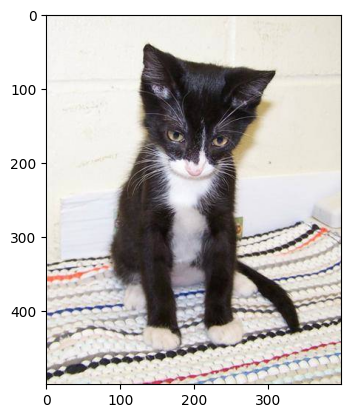

In [ ]:
img = mpimg.imread("/content/train/cat.4979.jpg")
imgplot = plt.imshow(img)
plt.show()

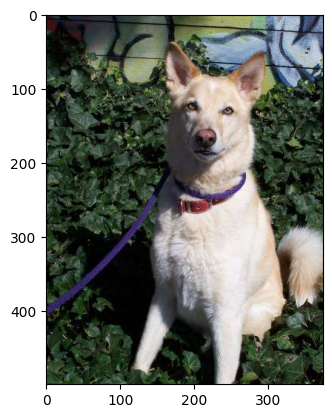

In [ ]:
img = mpimg.imread("/content/train/dog.6800.jpg")
imgplot = plt.imshow(img)
plt.show()

In [ ]:
files_name = os.listdir("/content/train/")
for i in range(5):
  name = files_name[i]
  print(name[0:3])

dog
dog
dog
cat
dog


In [ ]:
files_name = os.listdir("/content/train/")

dog_count = 0
cat_count = 0


for img_files in files_name:
  name = img_files[0:3]
  if name == "dog":
    dog_count +=1
  else:
    cat_count +=1
print("No of Dog images = ",dog_count)
print("No of cat images = ", cat_count)


No of Dog images =  12500
No of cat images =  12500


Resizing All the Images

In [ ]:
os.mkdir("/content/Image resized")

In [ ]:
orginal_folder = ("/content/train/")
resized_folder = ("/content/Image resized/")
for i in range(2000):
  files_name = os.listdir(orginal_folder)[i]
  img_path = orginal_folder+files_name

  img = Image.open(img_path)
  img = img.resize((224,224))

  new_image_path = resized_folder+files_name
  img.save(new_image_path)


display resized image

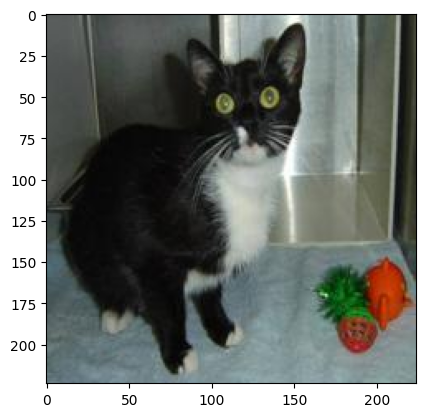

In [ ]:
img = mpimg.imread("/content/Image resized/cat.4070.jpg")
imgplot = plt.imshow(img)
plt.show()

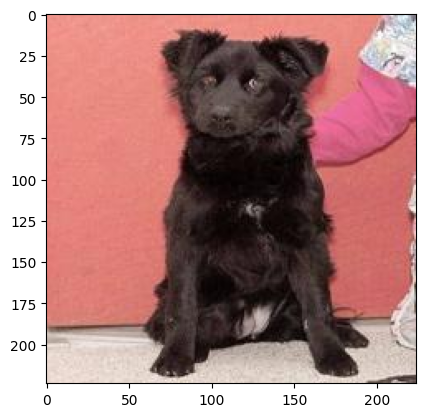

In [ ]:
img = mpimg.imread("/content/Image resized/dog.1778.jpg")
imgplot = plt.imshow(img)
plt.show()

Creating The labels

Cat --> 0
Dog --> 1

In [ ]:
files_name = os.listdir("/content/Image resized/")
labels = []
for i in range(2000):
  file_name = files_name[i]
  label = file_name[0:3]

  if labels == "dog":
    labels.append(1)
  else:
    labels.append(0)


In [ ]:
print(files_name[0:5])
print(len(files_name))

['dog.9241.jpg', 'dog.1886.jpg', 'dog.11058.jpg', 'cat.4070.jpg', 'dog.11894.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 0]
2000


Counting the Images of dogs and cats out of 2000

In [ ]:
values,counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0]
[2000]


Converting the all the resized Images Into Numpy

In [ ]:
import cv2
import glob

In [ ]:
image_directory = "/content/Image resized/"
image_extension = ["png","jpg"]

files = []

[files.extend(glob.glob(image_directory + "*." + e)) for e in image_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

[[[[ 41  57  70]
   [ 40  56  69]
   [ 37  53  66]
   ...
   [ 18  17  19]
   [ 19  18  22]
   [ 20  19  23]]

  [[ 38  54  67]
   [ 38  54  67]
   [ 38  54  67]
   ...
   [ 18  17  19]
   [ 19  18  22]
   [ 20  19  23]]

  [[ 37  50  64]
   [ 39  52  66]
   [ 39  55  68]
   ...
   [ 19  18  20]
   [ 20  19  23]
   [ 20  19  23]]

  ...

  [[253 252 254]
   [253 252 254]
   [253 252 254]
   ...
   [189 192 197]
   [189 192 197]
   [191 194 199]]

  [[253 252 254]
   [253 252 254]
   [253 252 254]
   ...
   [188 191 196]
   [190 193 198]
   [192 195 200]]

  [[255 254 255]
   [255 254 255]
   [255 254 255]
   ...
   [189 192 197]
   [191 194 199]
   [195 198 203]]]


 [[[ 58 102 109]
   [ 55  99 106]
   [ 52  94 101]
   ...
   [ 65  96  95]
   [ 66  93  89]
   [ 62  90  84]]

  [[ 59 101 108]
   [ 57  99 106]
   [ 52  94 101]
   ...
   [ 64  95  94]
   [ 66  93  89]
   [ 64  92  86]]

  [[ 56  96 101]
   [ 56  96 101]
   [ 53  93  98]
   ...
   [ 61  92  91]
   [ 64  91  87]
   [ 64  92

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [ ]:
x = dog_cat_images
y = np.asarray(labels)

In [ ]:
print(len(x))
print(len(y))

2000
2000


Train Test Split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =2)


In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 - Training image
400 = - test Image

scaling The data

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
print(x_train_scaled)

[[[[0.46666667 0.59607843 0.67058824]
   [0.4745098  0.60392157 0.68235294]
   [0.38431373 0.50196078 0.61568627]
   ...
   [0.82352941 0.85490196 0.88235294]
   [0.87843137 0.90196078 0.92156863]
   [0.95294118 0.98039216 0.99215686]]

  [[0.47843137 0.60784314 0.68235294]
   [0.43921569 0.56862745 0.64705882]
   [0.41568627 0.53333333 0.63921569]
   ...
   [0.83921569 0.87058824 0.89803922]
   [0.89803922 0.92156863 0.94117647]
   [0.95294118 0.98039216 0.99215686]]

  [[0.49411765 0.62352941 0.69803922]
   [0.41568627 0.54509804 0.62352941]
   [0.4627451  0.57647059 0.68235294]
   ...
   [0.85098039 0.88235294 0.90980392]
   [0.90588235 0.92941176 0.94901961]
   [0.92941176 0.95294118 0.97254902]]

  ...

  [[0.81568627 0.84705882 0.91372549]
   [0.81176471 0.84313725 0.90980392]
   [0.89803922 0.92941176 0.99607843]
   ...
   [0.67843137 0.72941176 0.79215686]
   [0.68627451 0.74509804 0.80784314]
   [0.61568627 0.6745098  0.7372549 ]]

  [[0.74901961 0.77647059 0.84313725]
   [0.7

Building the Neural network

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
mobilenet_model = "https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow2/tf2-preview-feature-vector/4?tfhub-redirect=true"
pretrained_model = hub.KerasLayer(mobilenet_model,input_shape = (224,224,3),trainable = False)


In [ ]:
num_of_classes = 2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ["acc"]
)

In [ ]:
model.fit(x_train_scaled,y_train,epochs = 5)

Epoch 1/5
50/50 [==============================] - 68s 1s/step - loss: 0.0270 - acc: 0.9931
Epoch 2/5
50/50 [==============================] - 67s 1s/step - loss: 1.5834e-04 - acc: 1.0000
Epoch 3/5
50/50 [==============================] - 61s 1s/step - loss: 1.4358e-04 - acc: 1.0000
Epoch 4/5
50/50 [==============================] - 62s 1s/step - loss: 1.3093e-04 - acc: 1.0000
Epoch 5/5
50/50 [==============================] - 61s 1s/step - loss: 1.1872e-04 - acc: 1.0000


In [ ]:
score,acc = model.evaluate(x_test_scaled,y_test)
print("Test Loss ",score)
print("Test Accuarcy",acc)

13/13 [==============================] - 14s 1s/step - loss: 9.2033e-05 - acc: 1.0000
Test Loss  9.203342051478103e-05
Test Accuarcy 1.0


Predictive system

In [ ]:
input_image_path = input("Path of the Image Predicated System : ")
input_image = cv2.imread(input_image_path)
cv2_imshow = (input_image)
input_image_resize = cv2.resize(input_image,(224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])
input_predication = model.predict(image_reshaped)
input_pred_label = np.argmax(input_predication)

if input_pred_label == 0:
  print("The Image represent a cat")
else:
  print("The Image represent a Dog")

KeyboardInterrupt: Interrupted by user